<a href="https://colab.research.google.com/github/mehravehj/Balanced-Mixture-of-SuperNets/blob/main/Pooling%20/analysis/Pooling_grad_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# prompt: load outputs_epoch_"analysis_epoch".pt from folder /content/drive/MyDrive/paper4/pooling/test_"test_number"/outputs/

import torch

ground_truth_accs = {1: 87.45, 19: 90.92,
2 : 87.69, 20 : 90.88,
3 : 87.89, 21 : 90.14,
4 : 88.6, 22 : 89.68,
5 : 89.38, 23 : 90.34,
6 : 90.13, 24 : 90.52,
7 : 90.16, 25 : 90.85,
8 : 89.41, 26 : 89.71,
9 : 88.78, 27 : 91.05,
10 : 89.03, 28 : 90.96,
11 : 90.42, 29 : 91.55,
12 : 90.57, 30 : 89.84,
13 : 90.89, 31 : 91.78,
14 : 91.01, 32 : 91.83,
15 : 90.22, 33 : 90.96,
16 : 89.1, 34 : 92.01,
17 : 89.7, 35 : 90.47,
18 : 90.61, 36 : 89.99}

all_paths = (
'(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)', '(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)', '(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)', '(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)', '(0, 1, 0, 0, 0, 0, 1, 0, 0, 0)', '(0, 1, 0, 0, 0, 0, 0, 1, 0, 0)', '(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)', '(0, 1, 0, 0, 0, 0, 0, 0, 0, 1)', '(0, 0, 1, 1, 0, 0, 0, 0, 0, 0)', '(0, 0, 1, 0, 1, 0, 0, 0, 0, 0)', '(0, 0, 1, 0, 0, 1, 0, 0, 0, 0)', '(0, 0, 1, 0, 0, 0, 1, 0, 0, 0)', '(0, 0, 1, 0, 0, 0, 0, 1, 0, 0)', '(0, 0, 1, 0, 0, 0, 0, 0, 1, 0)', '(0, 0, 1, 0, 0, 0, 0, 0, 0, 1)', '(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)', '(0, 0, 0, 1, 0, 1, 0, 0, 0, 0)', '(0, 0, 0, 1, 0, 0, 1, 0, 0, 0)', '(0, 0, 0, 1, 0, 0, 0, 1, 0, 0)', '(0, 0, 0, 1, 0, 0, 0, 0, 1, 0)', '(0, 0, 0, 1, 0, 0, 0, 0, 0, 1)', '(0, 0, 0, 0, 1, 1, 0, 0, 0, 0)', '(0, 0, 0, 0, 1, 0, 1, 0, 0, 0)', '(0, 0, 0, 0, 1, 0, 0, 1, 0, 0)', '(0, 0, 0, 0, 1, 0, 0, 0, 1, 0)', '(0, 0, 0, 0, 1, 0, 0, 0, 0, 1)', '(0, 0, 0, 0, 0, 1, 1, 0, 0, 0)', '(0, 0, 0, 0, 0, 1, 0, 1, 0, 0)', '(0, 0, 0, 0, 0, 1, 0, 0, 1, 0)', '(0, 0, 0, 0, 0, 1, 0, 0, 0, 1)', '(0, 0, 0, 0, 0, 0, 1, 1, 0, 0)', '(0, 0, 0, 0, 0, 0, 1, 0, 1, 0)', '(0, 0, 0, 0, 0, 0, 1, 0, 0, 1)', '(0, 0, 0, 0, 0, 0, 0, 1, 1, 0)', '(0, 0, 0, 0, 0, 0, 0, 1, 0, 1)', '(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)'
)


def load_output(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/outputs/outputs_epoch_{analysis_epoch}.pt'
    loaded_output = torch.load(file_path, weights_only=False)
    return loaded_output


def load_grad(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/gradients/gradients_epoch_{analysis_epoch}.pt'
    loaded_grad = torch.load(file_path, weights_only=False)
    return loaded_grad

def load_feature_maps(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/feature_maps/feature_maps_epoch_{analysis_epoch}.pt'
    loaded_features = torch.load(file_path, weights_only=False)
    return loaded_features

## 2. Grads
load

In [28]:
analysis_epoch = 1  # Replace with the desired epoch number
test_number = 3002      # Replace with the desired test number

analysis_epochs = [1, 6, 16, 26, 46, 71, 101, 126, 156, 171, 196]

import gc

gc.collect()
import os

# loaded_grads = load_grad(analysis_epoch, test_number)
grad_cosine(test_number, analysis_epochs)

load grads, calculate cosine sim for layers, save

In [25]:
def grad_cosine(test_number, analysis_epochs):
    gradients_dir = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/gradients/cosine_sim/'
    os.makedirs(gradients_dir, exist_ok=True)
    all_similarity_matrices = {}
    all_grad_sims = {}
    for analysis_epoch in analysis_epochs:
        try: del restructured_grads, all_similarity_matrices
        except: pass
        gc.collect()
        loaded_grads = load_grad(analysis_epoch, test_number)
        weight_names = tuple(loaded_grads['(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)'].keys())
        restructured_grads = {
            name: torch.stack([loaded_grads[path][name] for path in all_paths])
            for name in weight_names
        }
        del loaded_grads
        all_similarity_matrices = {}
        n_samples = len(all_paths)
        for key, gradients_tensor in restructured_grads.items():

            # Flatten all feature dimensions for each of the 36 samples
            flattened_gradients = gradients_tensor.reshape(n_samples, -1)

            # Calculate the pairwise cosine similarity
            similarity_matrix = cosine_similarity(flattened_gradients)

            # Store the resulting [36, 36] matrix in the results dictionary
            all_similarity_matrices[key] = similarity_matrix
        all_grad_sims[analysis_epoch] = all_similarity_matrices
    grad_sim_save_path = os.path.join(gradients_dir, f"grad_sims.pt")
    torch.save(all_grad_sims, grad_sim_save_path)


In [4]:
# prompt: get all the keys in loaded_grads['(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)'] into a tuple named weight_names

weight_names = tuple(loaded_grads['(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)'].keys())

make a dict of tensors

In [11]:
# Create a new dictionary keyed by the weight names
restructured_grads = {
    name: torch.stack([loaded_grads[path][name] for path in all_paths])
    for name in weight_names
}

del loaded_grads

cosine similarity

In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
all_similarity_matrices = {}
n_samples = len(all_paths)
for key, gradients_tensor in restructured_grads.items():

    # Flatten all feature dimensions for each of the 36 samples
    flattened_gradients = gradients_tensor.reshape(n_samples, -1)

    # Calculate the pairwise cosine similarity
    similarity_matrix = cosine_similarity(flattened_gradients)

    # Store the resulting [36, 36] matrix in the results dictionary
    all_similarity_matrices[key] = similarity_matrix

In [17]:
print(all_similarity_matrices['res_blocks.0.conv.weight'])

[[0.9999999  0.25868893 0.40485373 ... 0.54491043 0.34396157 0.56437254]
 [0.25868893 1.0000001  0.6081398  ... 0.40369532 0.50668824 0.32532653]
 [0.40485373 0.6081398  0.9999998  ... 0.4310328  0.38756895 0.42005038]
 ...
 [0.54491043 0.40369532 0.4310328  ... 0.99999976 0.66853076 0.6493072 ]
 [0.34396157 0.50668824 0.38756895 ... 0.66853076 0.99999946 0.6310245 ]
 [0.56437254 0.32532653 0.42005038 ... 0.6493072  0.6310245  0.9999994 ]]


In [ ]:
print(restructured_grads['res_blocks.0.conv.weight'])

In [ ]:
n_archs = len(all_paths)

flattened_gradients = gradients.reshape(n_samples, -1)

# Analysis of Gradient Similarities

In [31]:
test_numbers = [3000, 3001, 3002]

In [32]:
all_test_grad_sims = []
for test_number in test_numbers:
    grad_sim_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/gradients/cosine_sim/grad_sims.pt'
    if os.path.exists(grad_sim_path):
        all_test_grad_sims.append(torch.load(grad_sim_path, weights_only=False))
        print(f"Loaded grad_sims for test number {test_number}")
    else:
        print(f"File not found for test number {test_number}: {grad_sim_path}")

Loaded grad_sims for test number 3000
Loaded grad_sims for test number 3001
Loaded grad_sims for test number 3002


In [36]:
# prompt: calculate the average and stdev for each layer and each epoch across tests, ignore diagonal elements

import numpy as np
# Initialize dictionaries to store sums and counts for averaging and stdev calculation
layer_epoch_sums = {}
layer_epoch_counts = {}
layer_epoch_squared_diff_sums = {} # For standard deviation

# Iterate through each test's gradient similarities
for test_grad_sims in all_test_grad_sims:
    # Iterate through each epoch in the current test
    for epoch, layer_sims in test_grad_sims.items():
        # Iterate through each layer in the current epoch
        for layer, similarity_matrix in layer_sims.items():
            # Initialize entry for layer and epoch if not already present
            if layer not in layer_epoch_sums:
                layer_epoch_sums[layer] = {}
                layer_epoch_counts[layer] = {}
                layer_epoch_squared_diff_sums[layer] = {}

            if epoch not in layer_epoch_sums[layer]:
                layer_epoch_sums[layer][epoch] = 0.0
                layer_epoch_counts[layer][epoch] = 0
                layer_epoch_squared_diff_sums[layer][epoch] = 0.0

            # Convert to numpy for easier indexing and calculation
            sim_matrix_np = np.array(similarity_matrix)

            # Ignore diagonal elements
            non_diagonal_elements = sim_matrix_np[~np.eye(sim_matrix_np.shape[0], dtype=bool)]

            # Add to the sum and count for this layer and epoch
            layer_epoch_sums[layer][epoch] += np.sum(non_diagonal_elements)
            layer_epoch_counts[layer][epoch] += non_diagonal_elements.size

# Calculate average and stdev for each layer and epoch
layer_epoch_averages = {}
layer_epoch_stdevs = {}

for layer, epoch_data in layer_epoch_sums.items():
    layer_epoch_averages[layer] = {}
    layer_epoch_stdevs[layer] = {}
    for epoch, total_sum in epoch_data.items():
        count = layer_epoch_counts[layer][epoch]
        if count > 0:
            average = total_sum / count
            layer_epoch_averages[layer][epoch] = average

            # Now calculate the squared differences from the average for standard deviation
            # We need to re-iterate through the test data to get the individual non-diagonal elements
            for test_grad_sims in all_test_grad_sims:
                if epoch in test_grad_sims and layer in test_grad_sims[epoch]:
                     sim_matrix_np = np.array(test_grad_sims[epoch][layer])
                     non_diagonal_elements = sim_matrix_np[~np.eye(sim_matrix_np.shape[0], dtype=bool)]
                     layer_epoch_squared_diff_sums[layer][epoch] += np.sum((non_diagonal_elements - average) ** 2)

            # Calculate standard deviation
            if count > 1: # Need at least two data points for standard deviation
                stdev = np.sqrt(layer_epoch_squared_diff_sums[layer][epoch] / (count - 1))
                layer_epoch_stdevs[layer][epoch] = stdev
            else:
                layer_epoch_stdevs[layer][epoch] = np.nan # Standard deviation is undefined for n=1

# Print the results
print("Average Cosine Similarity (Ignoring Diagonal):")
for layer, epoch_data in layer_epoch_averages.items():
    print(f"Layer: {layer}")
    for epoch, avg in epoch_data.items():
        print(f"  Epoch {epoch}: {avg:.4f}")

print("\nStandard Deviation of Cosine Similarity (Ignoring Diagonal):")
for layer, epoch_data in layer_epoch_stdevs.items():
    print(f"Layer: {layer}")
    for epoch, stdev in epoch_data.items():
        print(f"  Epoch {epoch}: {stdev:.4f}")


Average Cosine Similarity (Ignoring Diagonal):
Layer: res_blocks.0.conv.weight
  Epoch 1: 0.5571
  Epoch 6: 0.8872
  Epoch 16: 0.9044
  Epoch 26: 0.8783
  Epoch 46: 0.8877
  Epoch 71: 0.9023
  Epoch 101: 0.8742
  Epoch 126: 0.8121
  Epoch 156: 0.7607
  Epoch 171: 0.8171
  Epoch 196: 0.7289
Layer: res_blocks.1.conv1.weight
  Epoch 1: 0.5081
  Epoch 6: 0.8640
  Epoch 16: 0.8580
  Epoch 26: 0.8220
  Epoch 46: 0.8226
  Epoch 71: 0.8265
  Epoch 101: 0.7923
  Epoch 126: 0.7751
  Epoch 156: 0.7239
  Epoch 171: 0.7198
  Epoch 196: 0.7235
Layer: res_blocks.1.conv2.weight
  Epoch 1: 0.5703
  Epoch 6: 0.8436
  Epoch 16: 0.8543
  Epoch 26: 0.8262
  Epoch 46: 0.8305
  Epoch 71: 0.8238
  Epoch 101: 0.7770
  Epoch 126: 0.7716
  Epoch 156: 0.7470
  Epoch 171: 0.7318
  Epoch 196: 0.7276
Layer: res_blocks.2.conv1.weight
  Epoch 1: 0.5402
  Epoch 6: 0.8285
  Epoch 16: 0.8690
  Epoch 26: 0.8303
  Epoch 46: 0.8319
  Epoch 71: 0.8463
  Epoch 101: 0.7936
  Epoch 126: 0.8310
  Epoch 156: 0.8134
  Epoch 171: 0

# Visulaize Sim

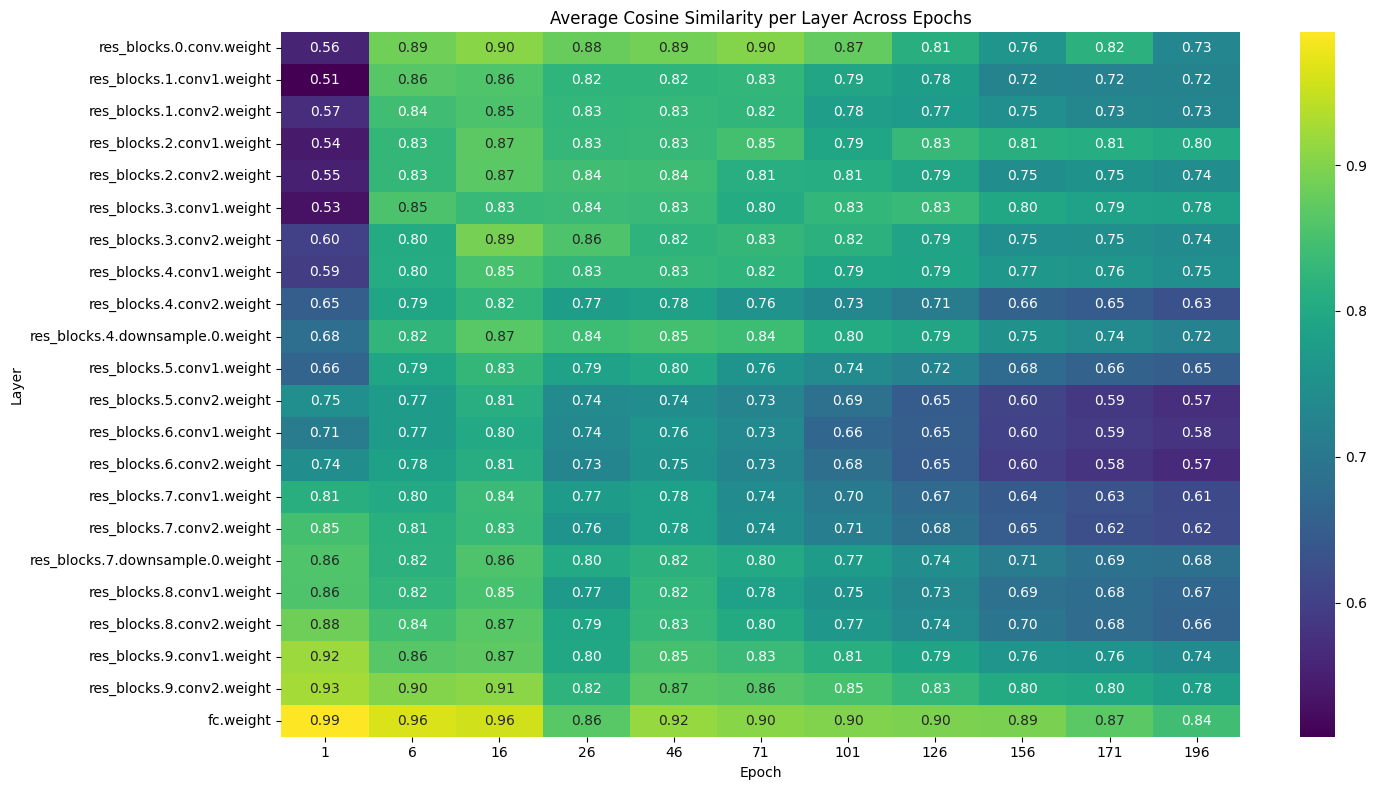

In [39]:
# prompt: for a all layers, plot the heatmap acros epcohs of average similrity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for heatmap
heatmap_data = []
layer_order = list(layer_epoch_averages.keys())
epoch_order = sorted(list(analysis_epochs))

for layer in layer_order:
    row_data = []
    for epoch in epoch_order:
        row_data.append(layer_epoch_averages[layer].get(epoch, np.nan)) # Use np.nan for missing values
    heatmap_data.append(row_data)

heatmap_data = np.array(heatmap_data)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=epoch_order, yticklabels=layer_order)
plt.xlabel("Epoch")
plt.ylabel("Layer")
plt.title("Average Cosine Similarity per Layer Across Epochs")
plt.tight_layout()
plt.show()


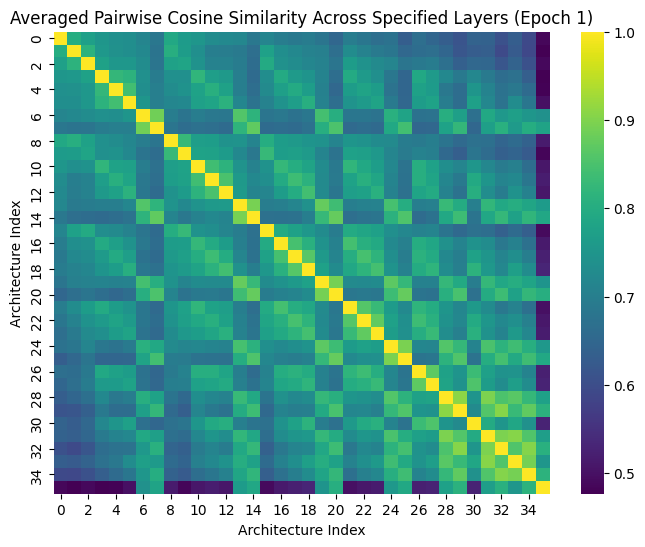

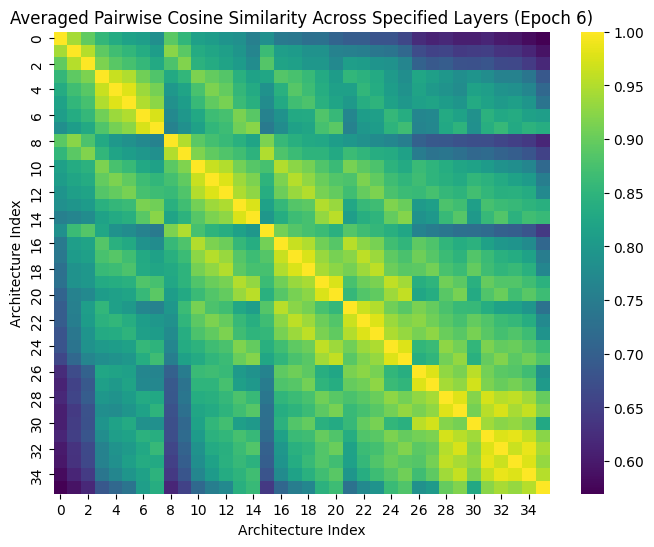

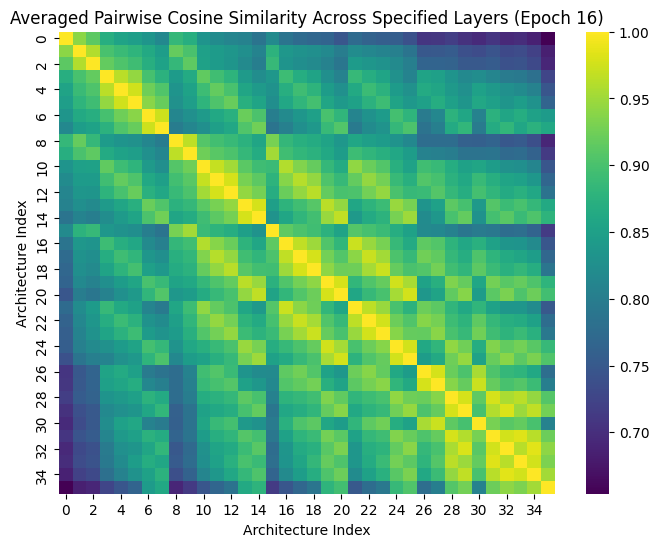

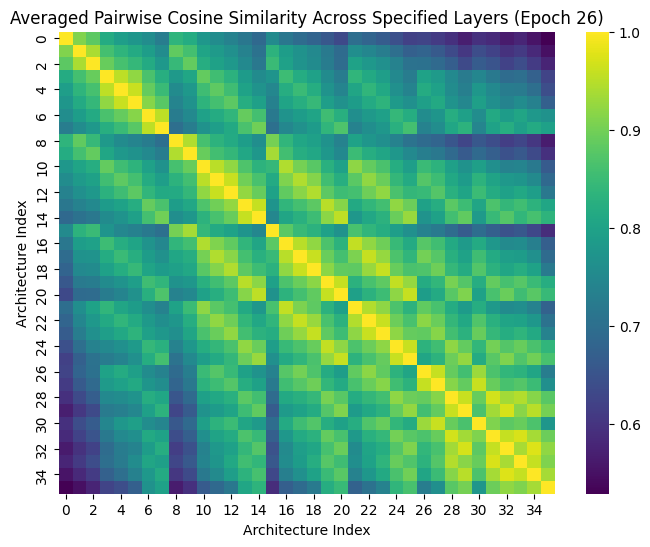

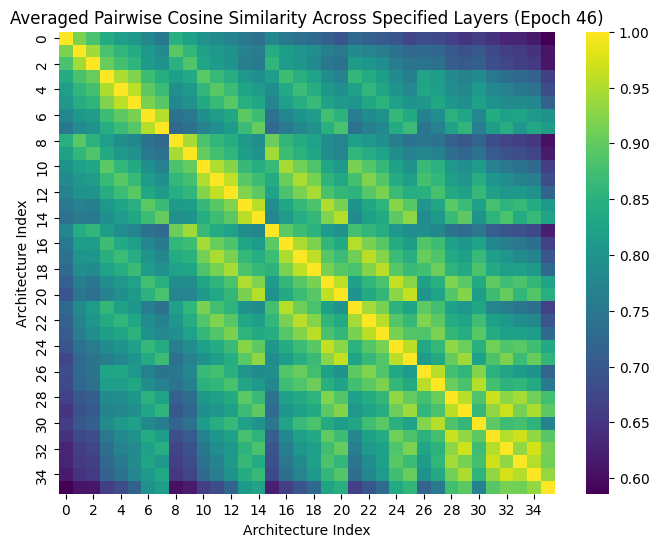

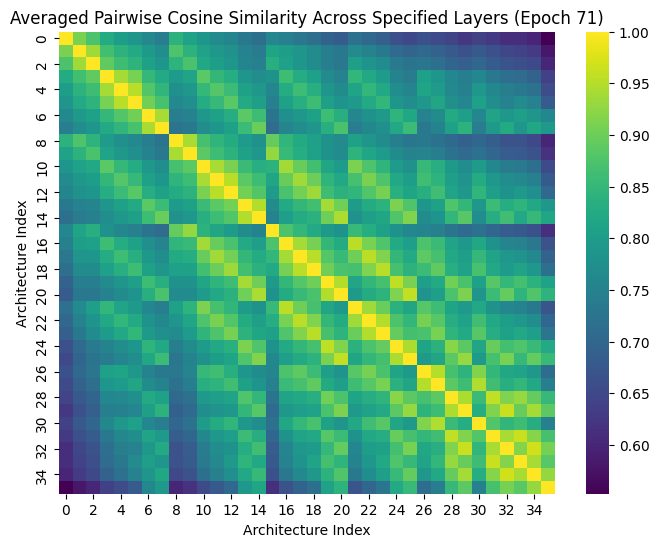

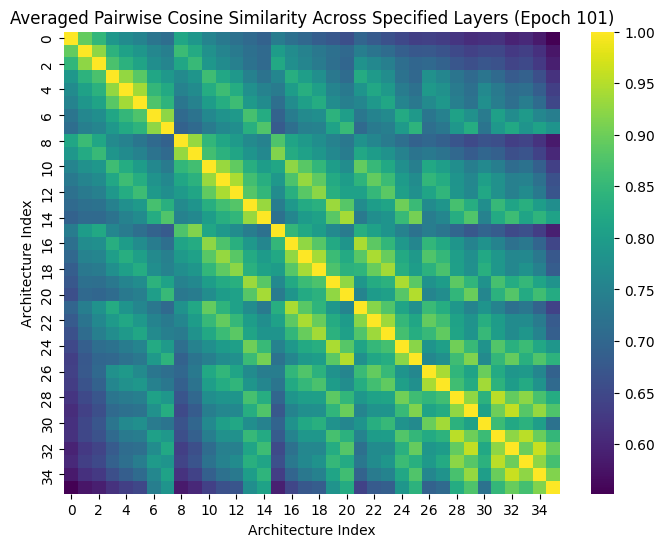

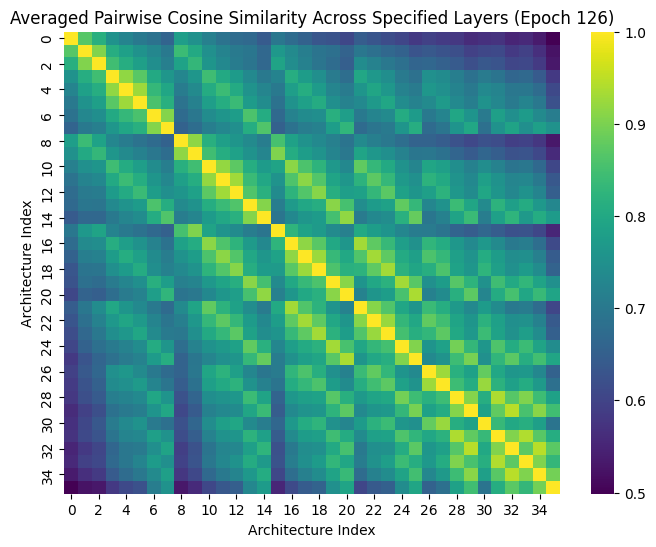

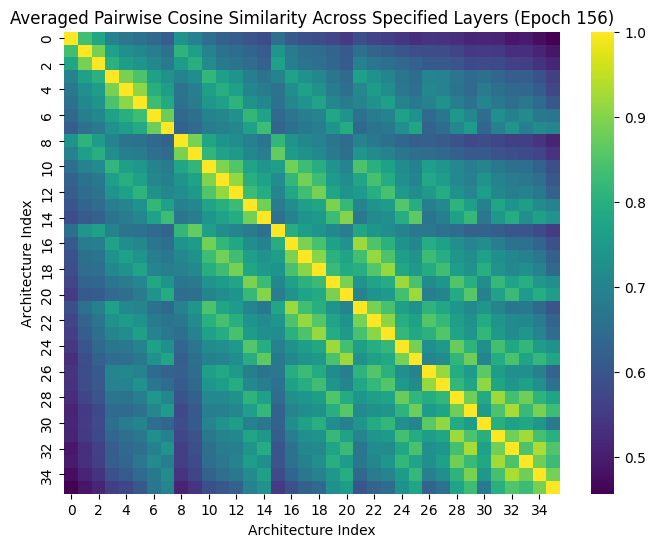

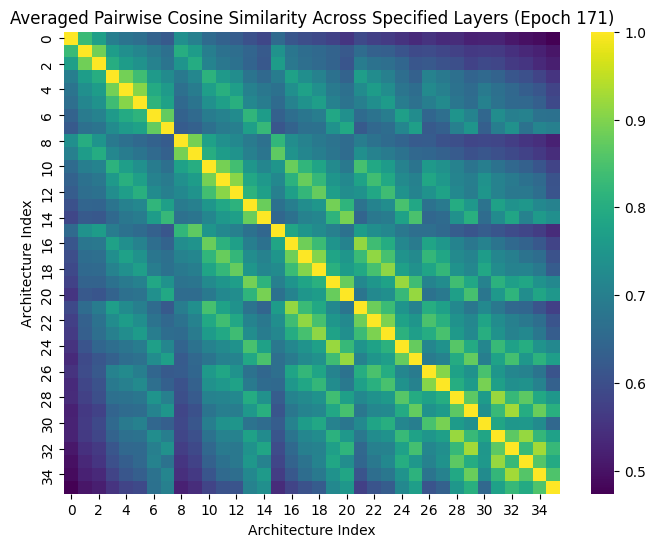

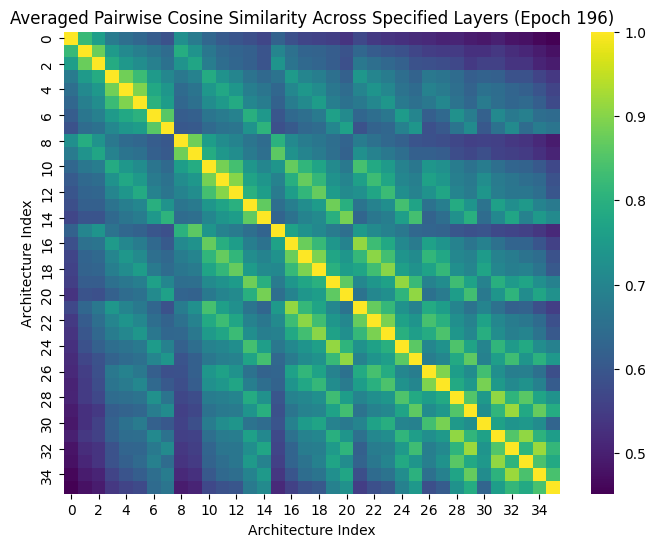

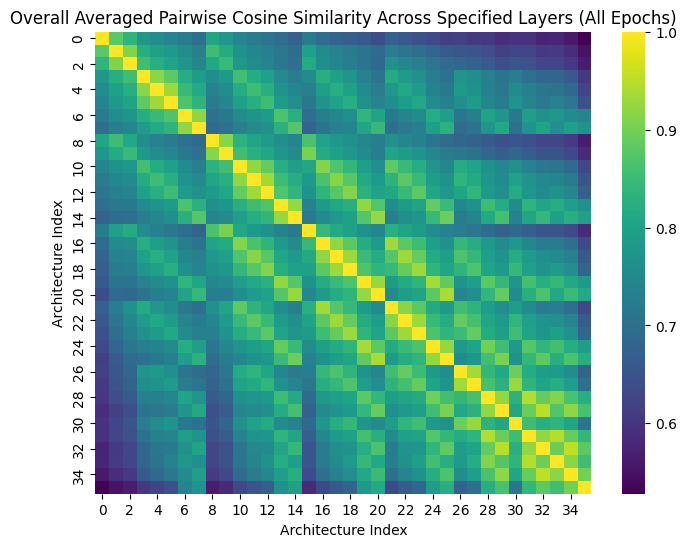

In [47]:
# prompt: for  res_block.0.conv.weigth and res_block.n.conv2.weigth and fc.weight for different n, average each pariwise value to have a 36 by 36 matrix then plot heatmaps

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Identify the layers of interest
layers_of_interest = [
    'res_blocks.0.conv.weight',
    'res_blocks.1.conv2.weight', 'res_blocks.2.conv2.weight', 'res_blocks.3.conv2.weight',
    'res_blocks.4.conv2.weight', 'res_blocks.5.conv2.weight', 'res_blocks.6.conv2.weight',
    'res_blocks.7.conv2.weight', 'res_blocks.8.conv2.weight', 'res_blocks.9.conv2.weight',
    'res_blocks.10.conv2.weight', 'res_blocks.11.conv2.weight', 'res_blocks.12.conv2.weight',
    'res_blocks.13.conv2.weight', 'res_blocks.14.conv2.weight', 'res_blocks.15.conv2.weight',
    'res_blocks.16.conv2.weight', 'res_blocks.17.conv2.weight', 'res_blocks.18.conv2.weight',
    'res_blocks.19.conv2.weight', 'res_blocks.20.conv2.weight', 'res_blocks.21.conv2.weight',
    'res_blocks.22.conv2.weight', 'res_blocks.23.conv2.weight', 'res_blocks.24.conv2.weight',
    'res_blocks.25.conv2.weight', 'res_blocks.26.conv2.weight', 'res_blocks.27.conv2.weight',
    'res_blocks.28.conv2.weight', 'res_blocks.29.conv2.weight', 'res_blocks.30.conv2.weight',
    'res_blocks.31.conv2.weight', 'res_blocks.32.conv2.weight', 'res_blocks.33.conv2.weight',
    'res_blocks.34.conv2.weight', 'res_blocks.35.conv2.weight',
    'fc.weight'
]

# Dictionary to store the sum and counts for averaging for each epoch
epoch_pairwise_sums = {epoch: np.zeros((len(all_paths), len(all_paths))) for test_grad_sims in all_test_grad_sims for epoch in test_grad_sims.keys()}
epoch_pairwise_counts = {epoch: np.zeros((len(all_paths), len(all_paths)), dtype=int) for test_grad_sims in all_test_grad_sims for epoch in test_grad_sims.keys()}


# Iterate through each test's gradient similarities
for test_grad_sims in all_test_grad_sims:
    # Iterate through each epoch in the current test
    for epoch, layer_sims in test_grad_sims.items():
        # For each pair of architectures (i, j)
        for i in range(len(all_paths)):
            for j in range(len(all_paths)):
                 if i != j: # Exclude self-similarity (diagonal)
                    sim_values_to_average = []
                    # Iterate through the layers of interest
                    for layer_name in layers_of_interest:
                        if layer_name in layer_sims:
                            # Get the similarity value between arch i and arch j for this layer
                            sim_value = layer_sims[layer_name][i, j]
                            sim_values_to_average.append(sim_value)

                    if sim_values_to_average:
                        # Sum the values for this (i, j) pair and epoch
                        epoch_pairwise_sums[epoch][i, j] += np.sum(sim_values_to_average)
                        epoch_pairwise_counts[epoch][i, j] += len(sim_values_to_average)


# Calculate and plot the average pairwise similarity for each epoch
for epoch in sorted(epoch_pairwise_sums.keys()):
    average_pairwise_matrix_epoch = np.zeros((len(all_paths), len(all_paths)))
    for i in range(len(all_paths)):
        for j in range(len(all_paths)):
            if i == j:
                average_pairwise_matrix_epoch[i, j] = 1.0 # Set diagonal to 1
            elif epoch_pairwise_counts[epoch][i, j] > 0:
                average_pairwise_matrix_epoch[i, j] = epoch_pairwise_sums[epoch][i, j] / epoch_pairwise_counts[epoch][i, j]
            else:
                average_pairwise_matrix_epoch[i, j] = np.nan # Handle cases where no data was available

    # Plot the heatmap for the current epoch
    plt.figure(figsize=(8, 6))
    sns.heatmap(average_pairwise_matrix_epoch, cmap="viridis", annot=False, fmt=".2f") # annot=True can be too cluttered
    plt.title(f"Averaged Pairwise Cosine Similarity Across Specified Layers (Epoch {epoch})")
    plt.xlabel("Architecture Index")
    plt.ylabel("Architecture Index")
    plt.show()

# Calculate and plot the overall average pairwise similarity across all epochs and tests
overall_total_sim_sums = np.zeros((len(all_paths), len(all_paths)))
overall_total_sim_counts = np.zeros((len(all_paths), len(all_paths)), dtype=int)

for epoch in epoch_pairwise_sums.keys():
    overall_total_sim_sums += epoch_pairwise_sums[epoch]
    overall_total_sim_counts += epoch_pairwise_counts[epoch]


overall_average_pairwise_matrix = np.zeros((len(all_paths), len(all_paths)))
for i in range(len(all_paths)):
    for j in range(len(all_paths)):
        if i == j:
             overall_average_pairwise_matrix[i, j] = 1.0 # Set diagonal to 1
        elif overall_total_sim_counts[i, j] > 0:
            overall_average_pairwise_matrix[i, j] = overall_total_sim_sums[i, j] / overall_total_sim_counts[i, j]
        else:
            overall_average_pairwise_matrix[i, j] = np.nan # Handle cases where no data was available

# Plot the heatmap for the overall average
plt.figure(figsize=(8, 6))
sns.heatmap(overall_average_pairwise_matrix, cmap="viridis", annot=False, fmt=".2f") # annot=True can be too cluttered
plt.title("Overall Averaged Pairwise Cosine Similarity Across Specified Layers (All Epochs)")
plt.xlabel("Architecture Index")
plt.ylabel("Architecture Index")
plt.show()

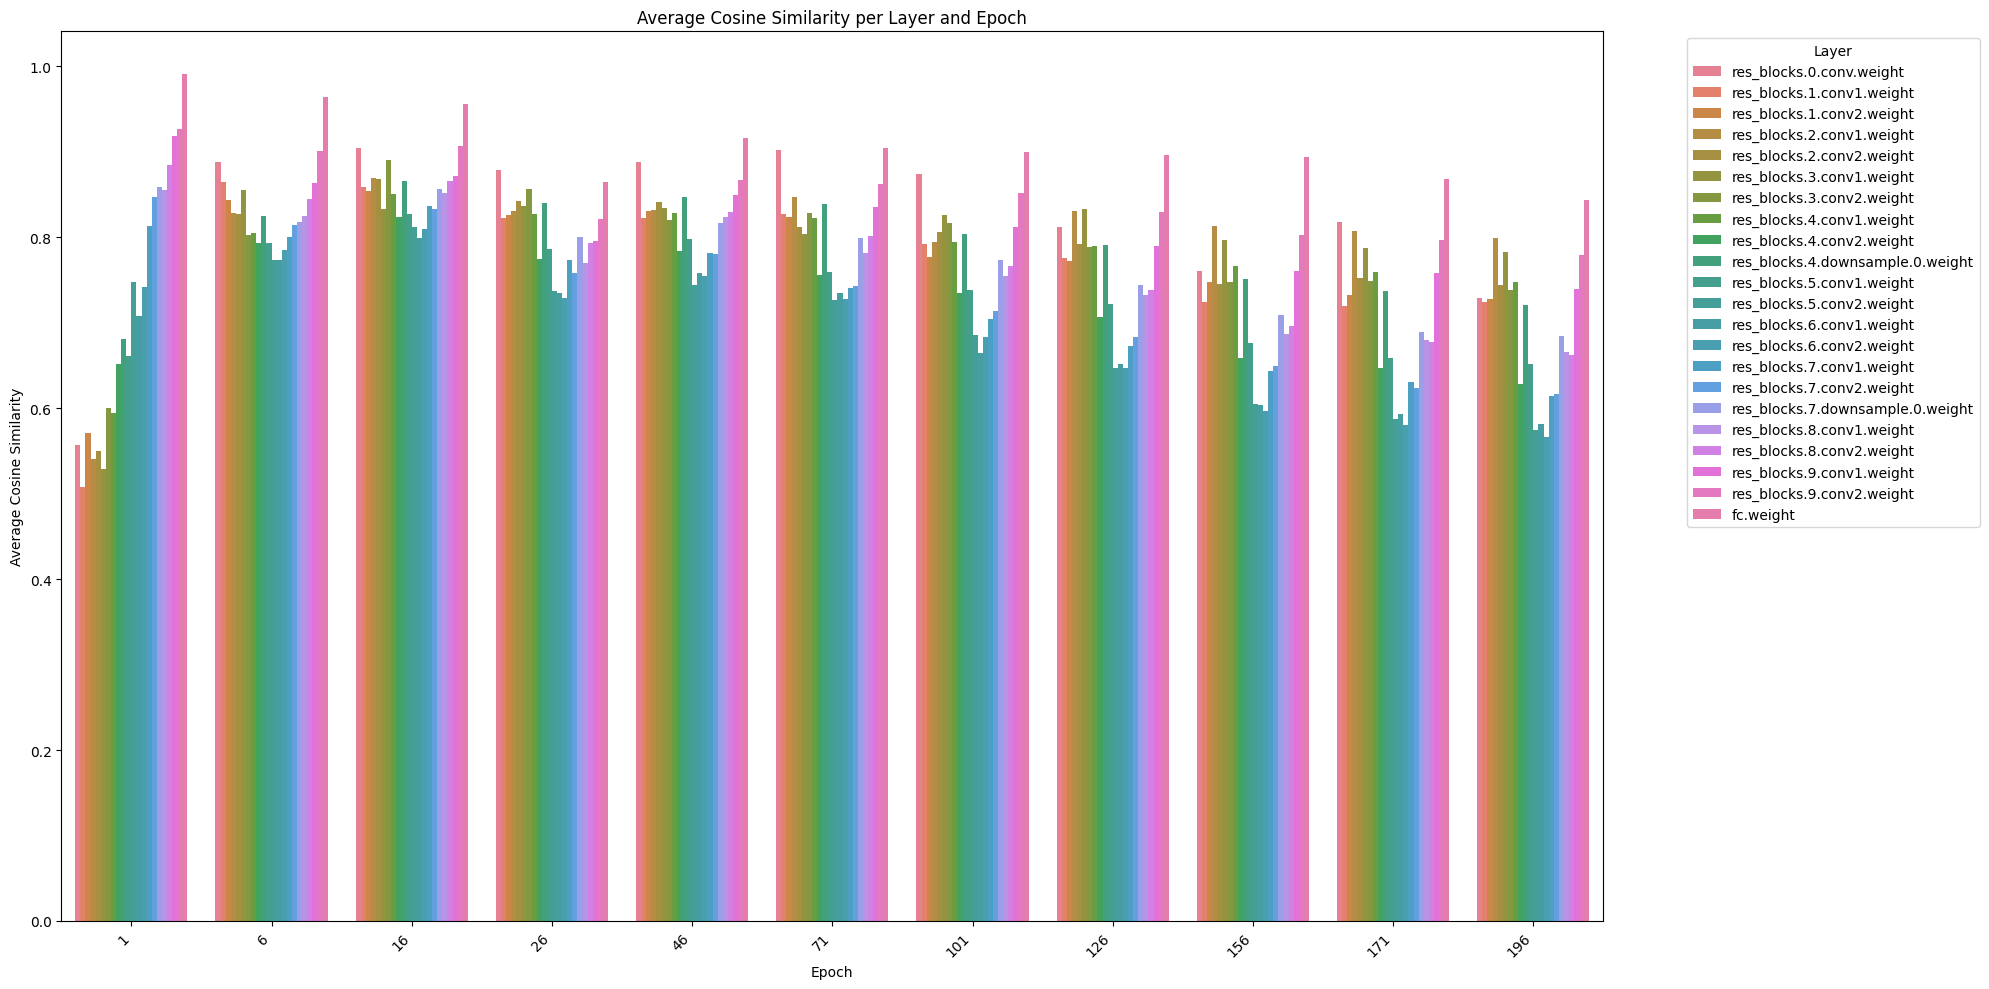

In [48]:
# prompt: can you give me a bar plot of average similarities for the previous heatmaps for each architecture and each epcoh and each layer

import matplotlib.pyplot as plt
import numpy as np
# Prepare data for the bar plot
bar_plot_data = []
for layer in layer_order:
    for epoch in epoch_order:
        avg_similarity = layer_epoch_averages[layer].get(epoch, np.nan)
        if not np.isnan(avg_similarity):
            bar_plot_data.append({
                'Layer': layer,
                'Epoch': epoch,
                'Average Similarity': avg_similarity
            })

import pandas as pd
df_bar = pd.DataFrame(bar_plot_data)

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(data=df_bar, x='Epoch', y='Average Similarity', hue='Layer')
plt.title("Average Cosine Similarity per Layer and Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Cosine Similarity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Layer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


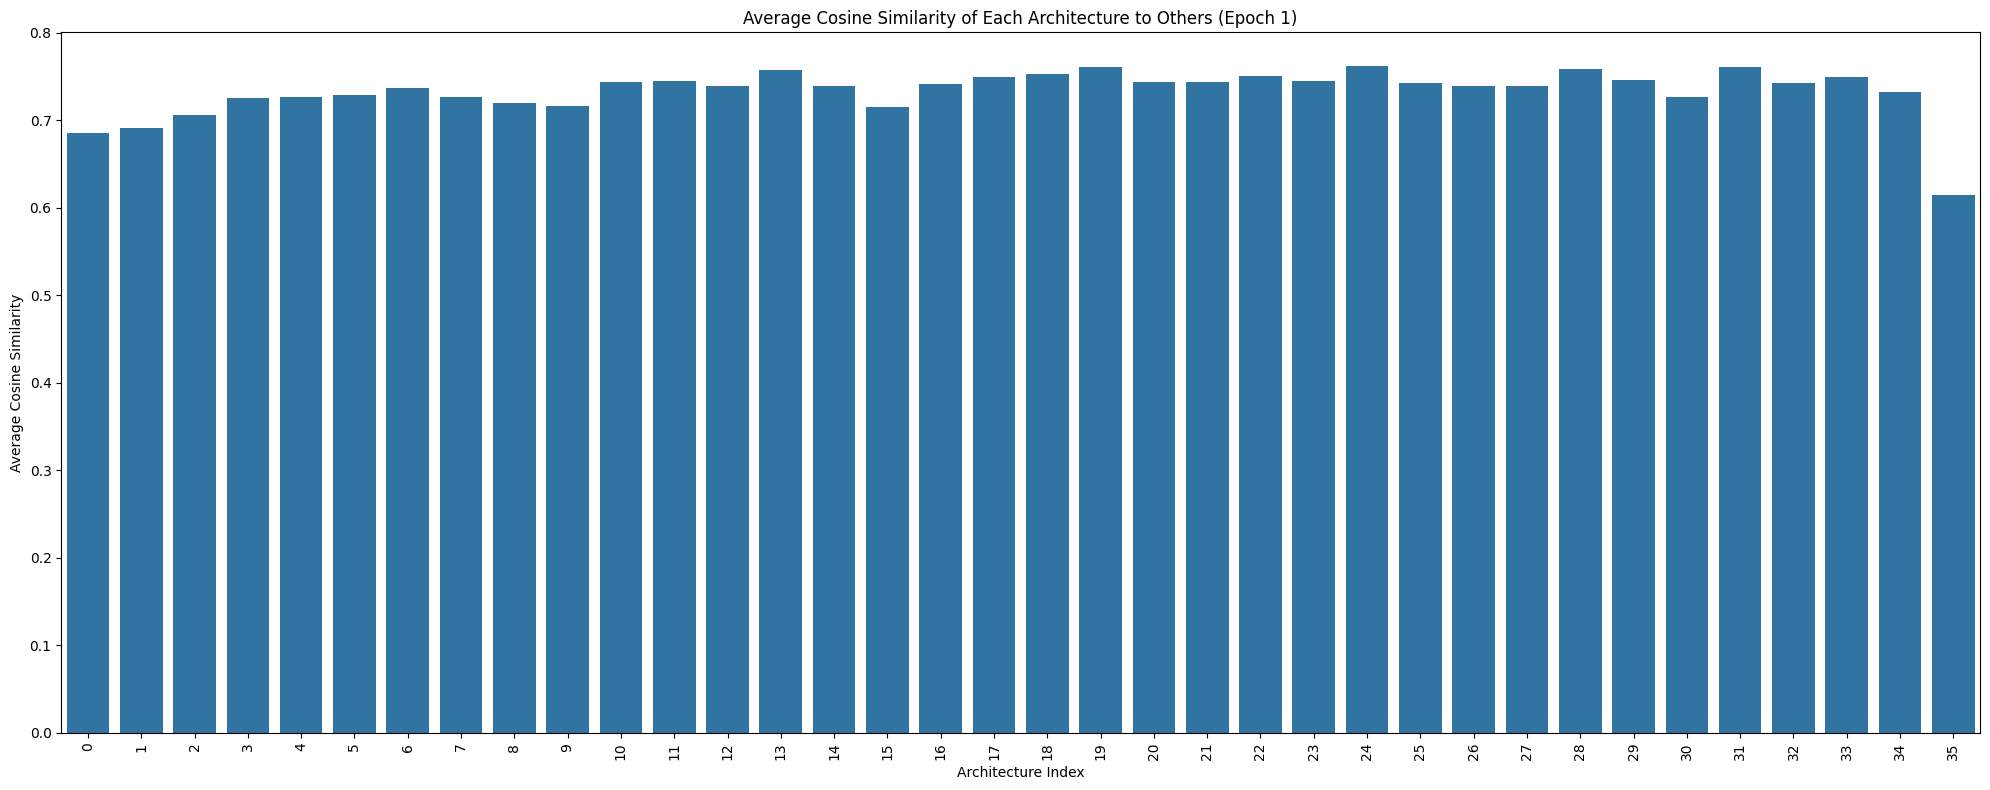

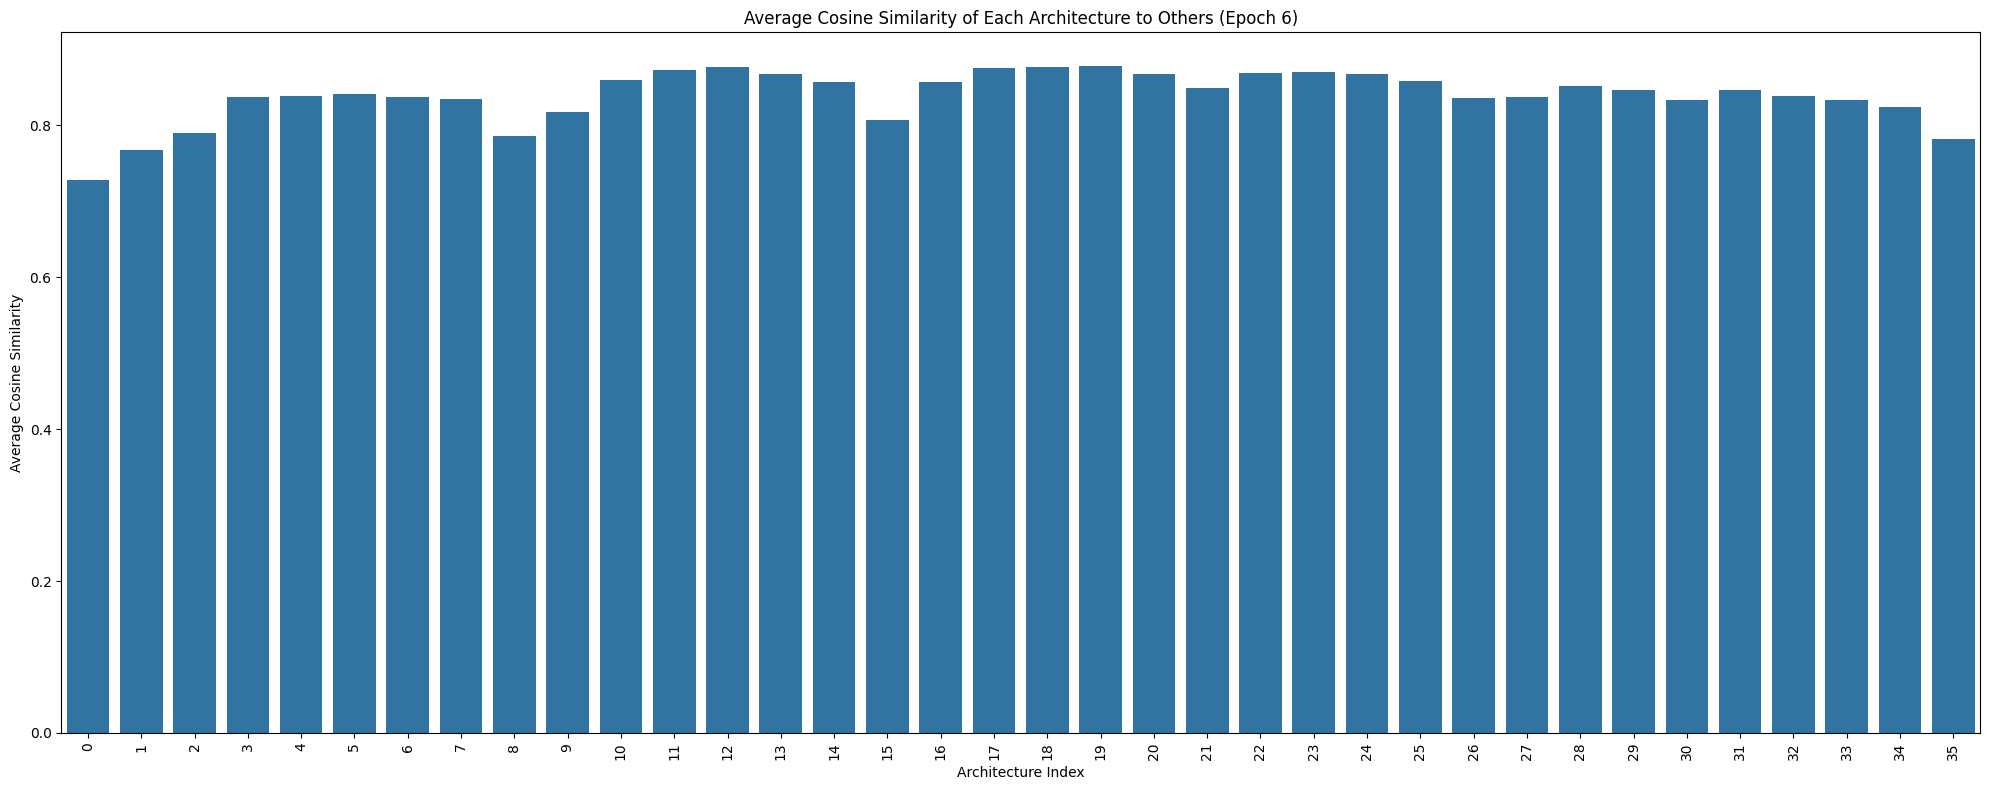

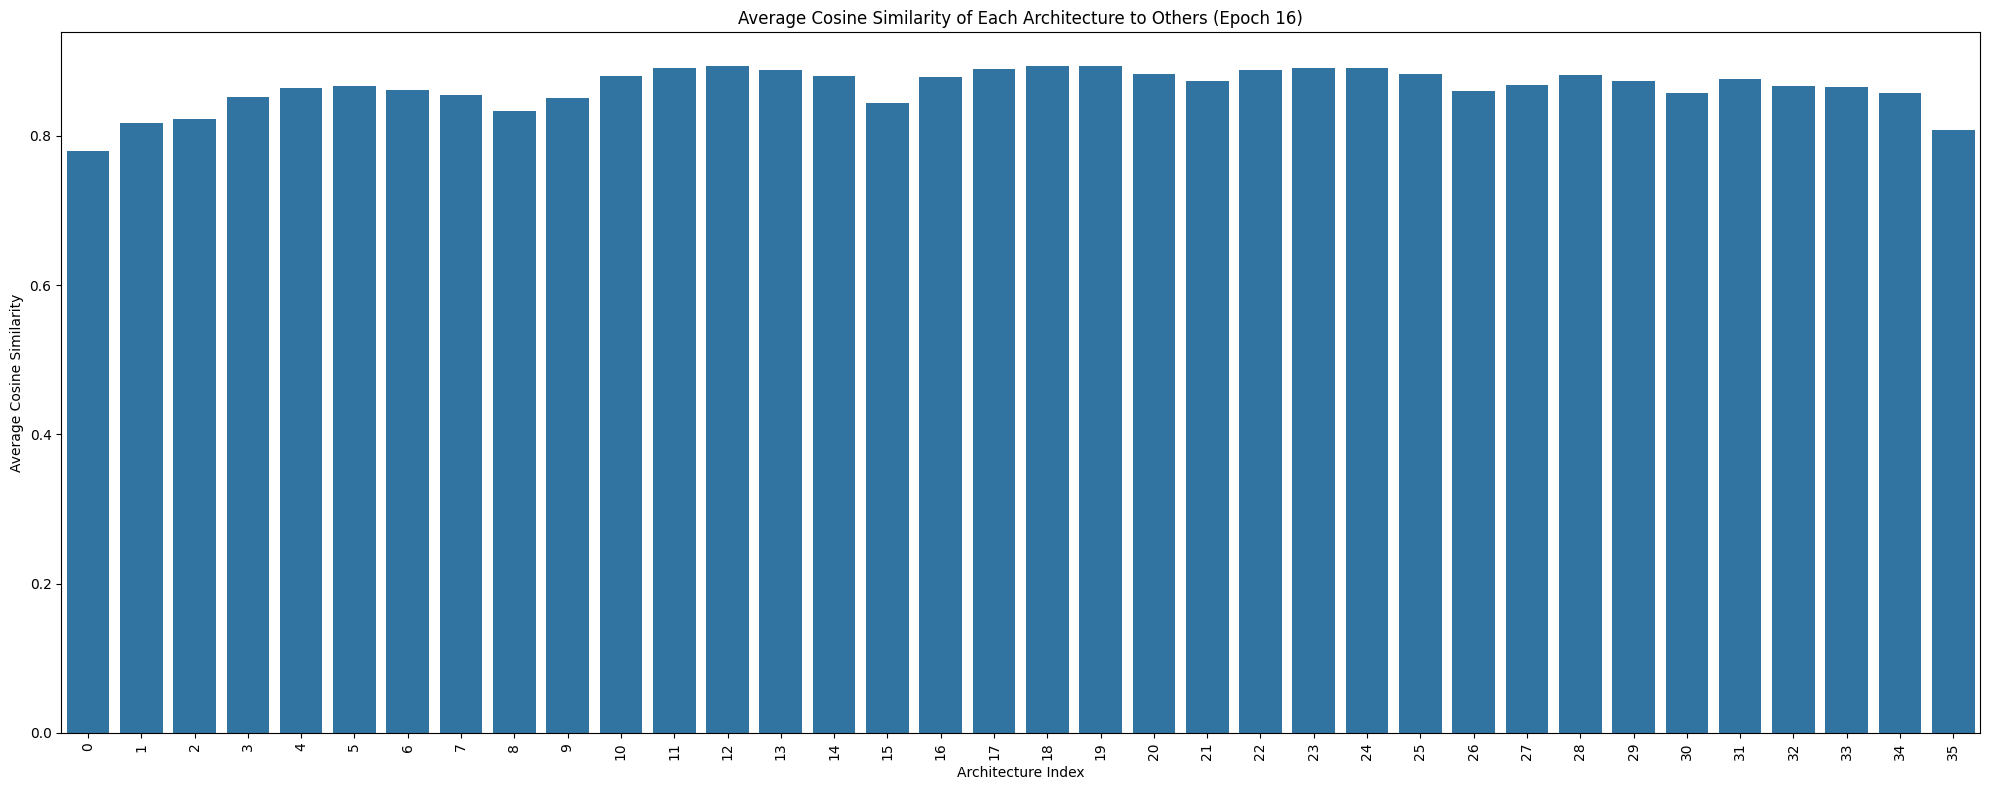

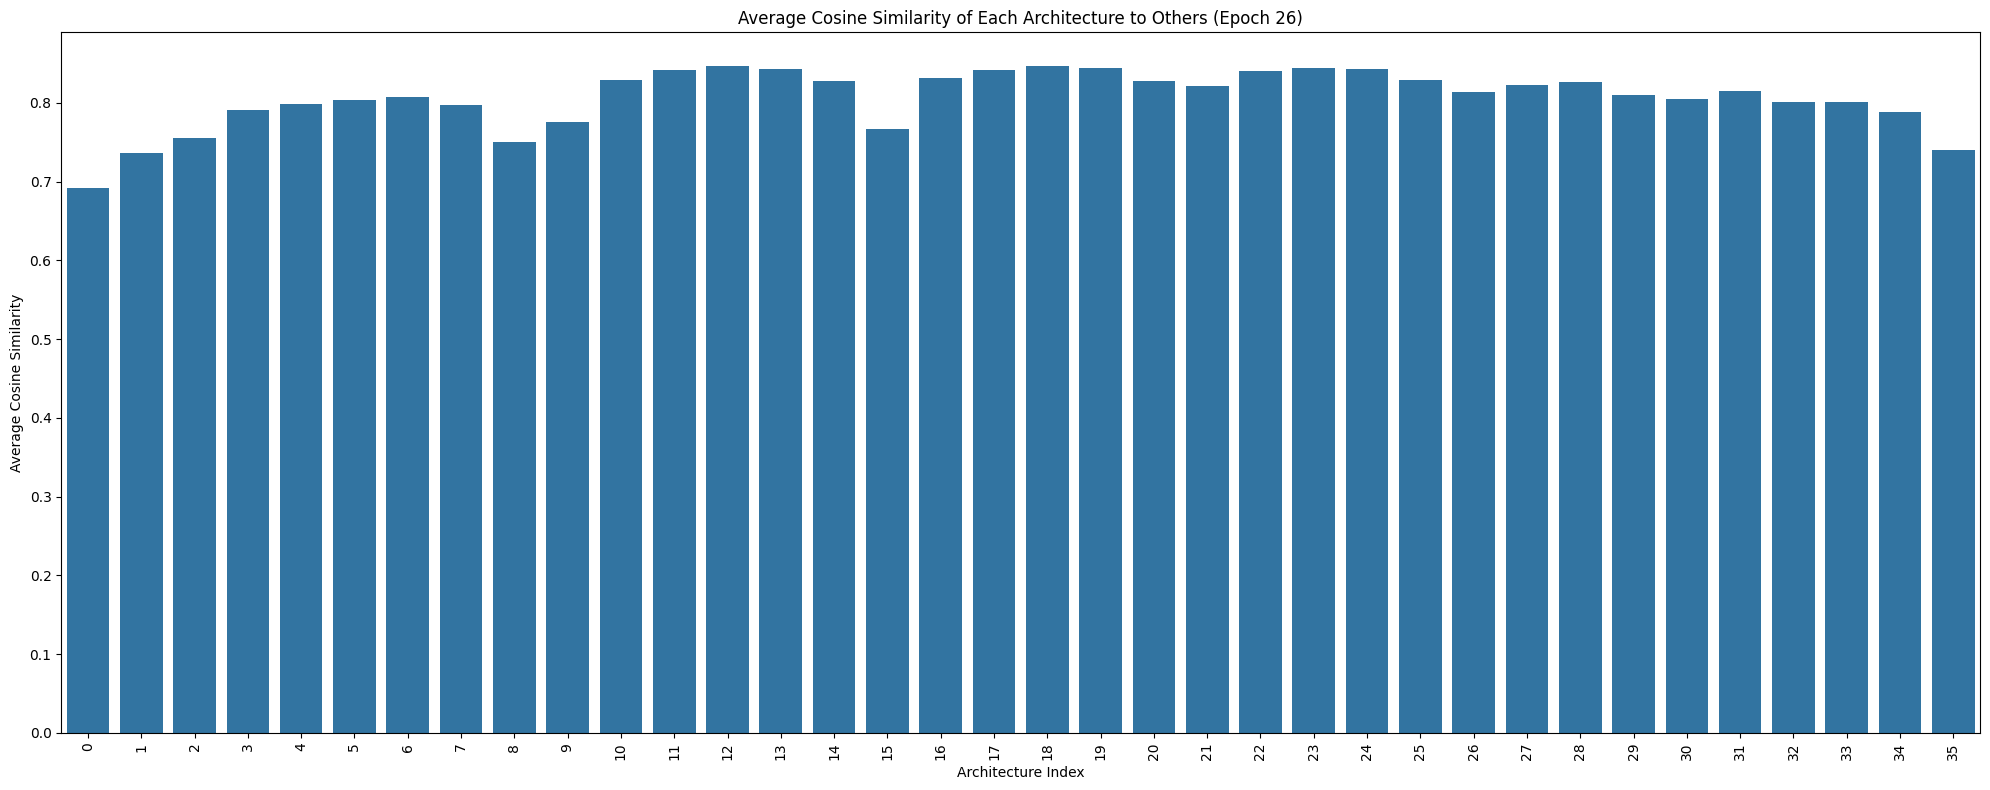

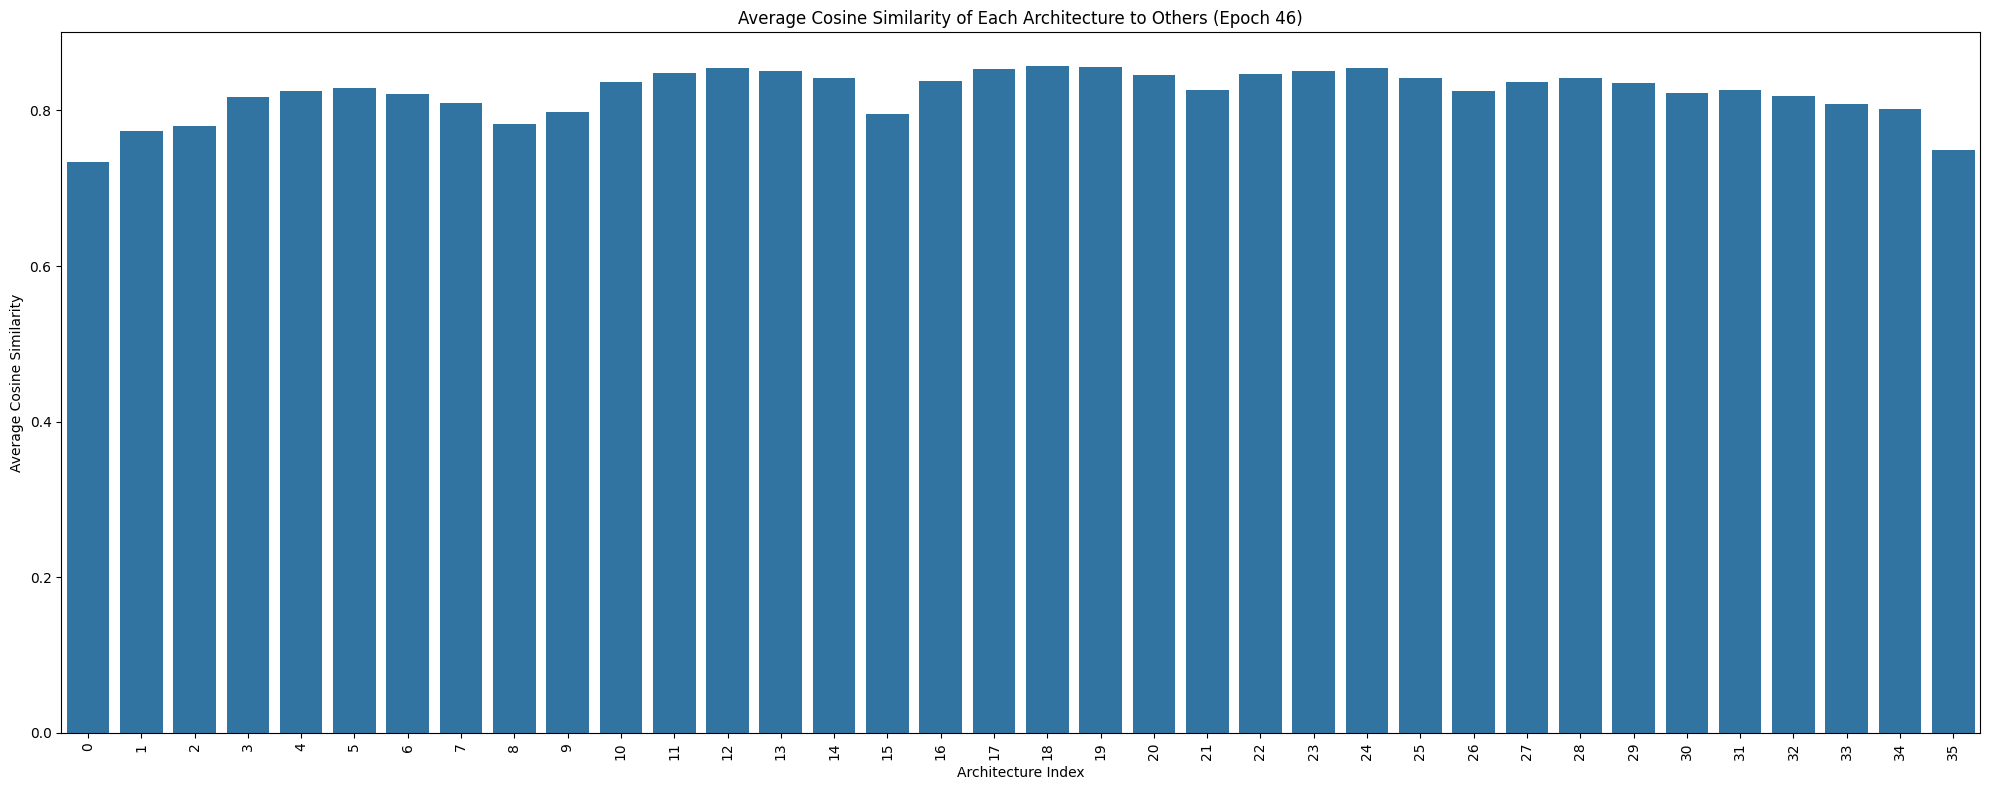

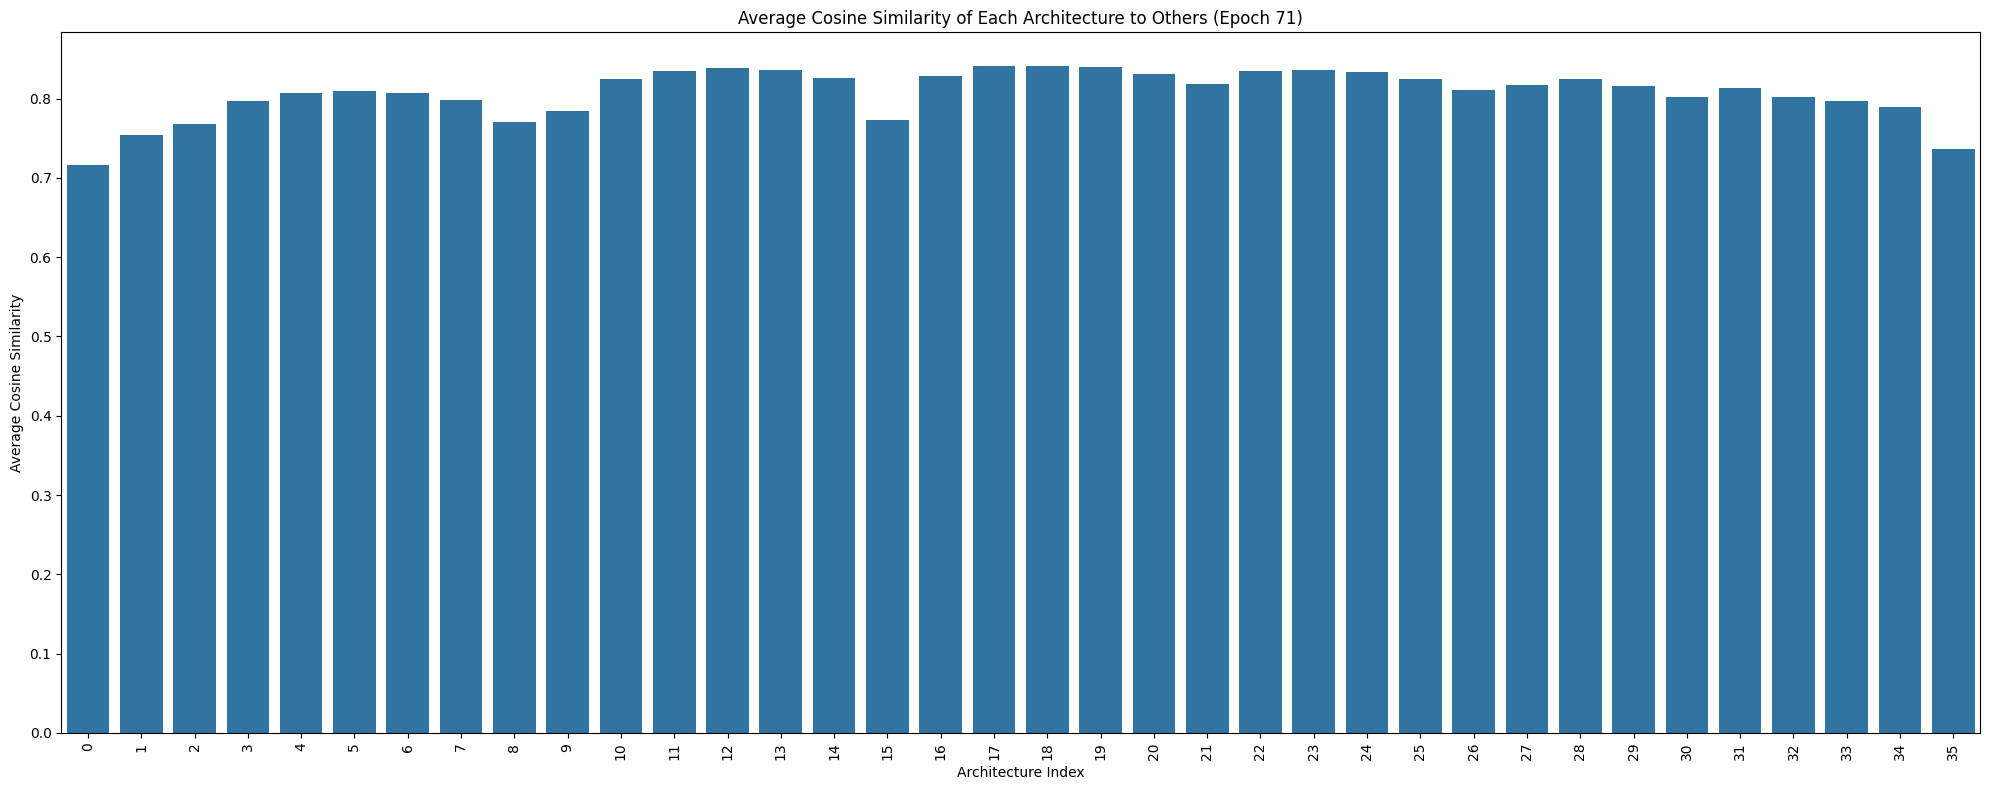

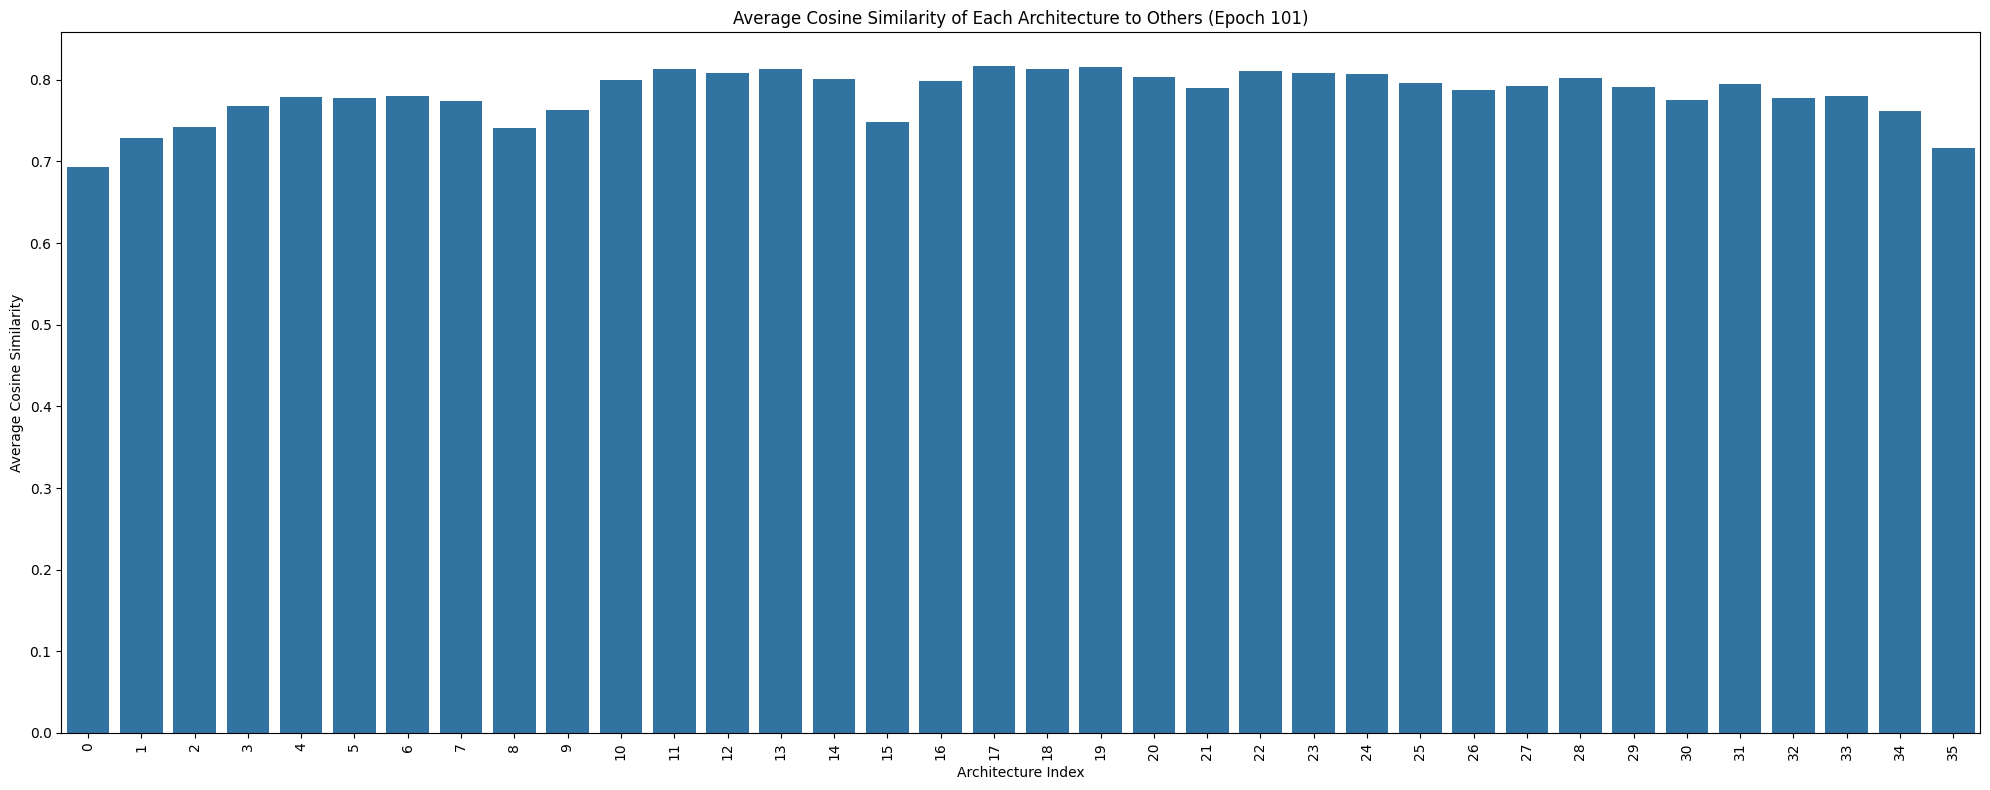

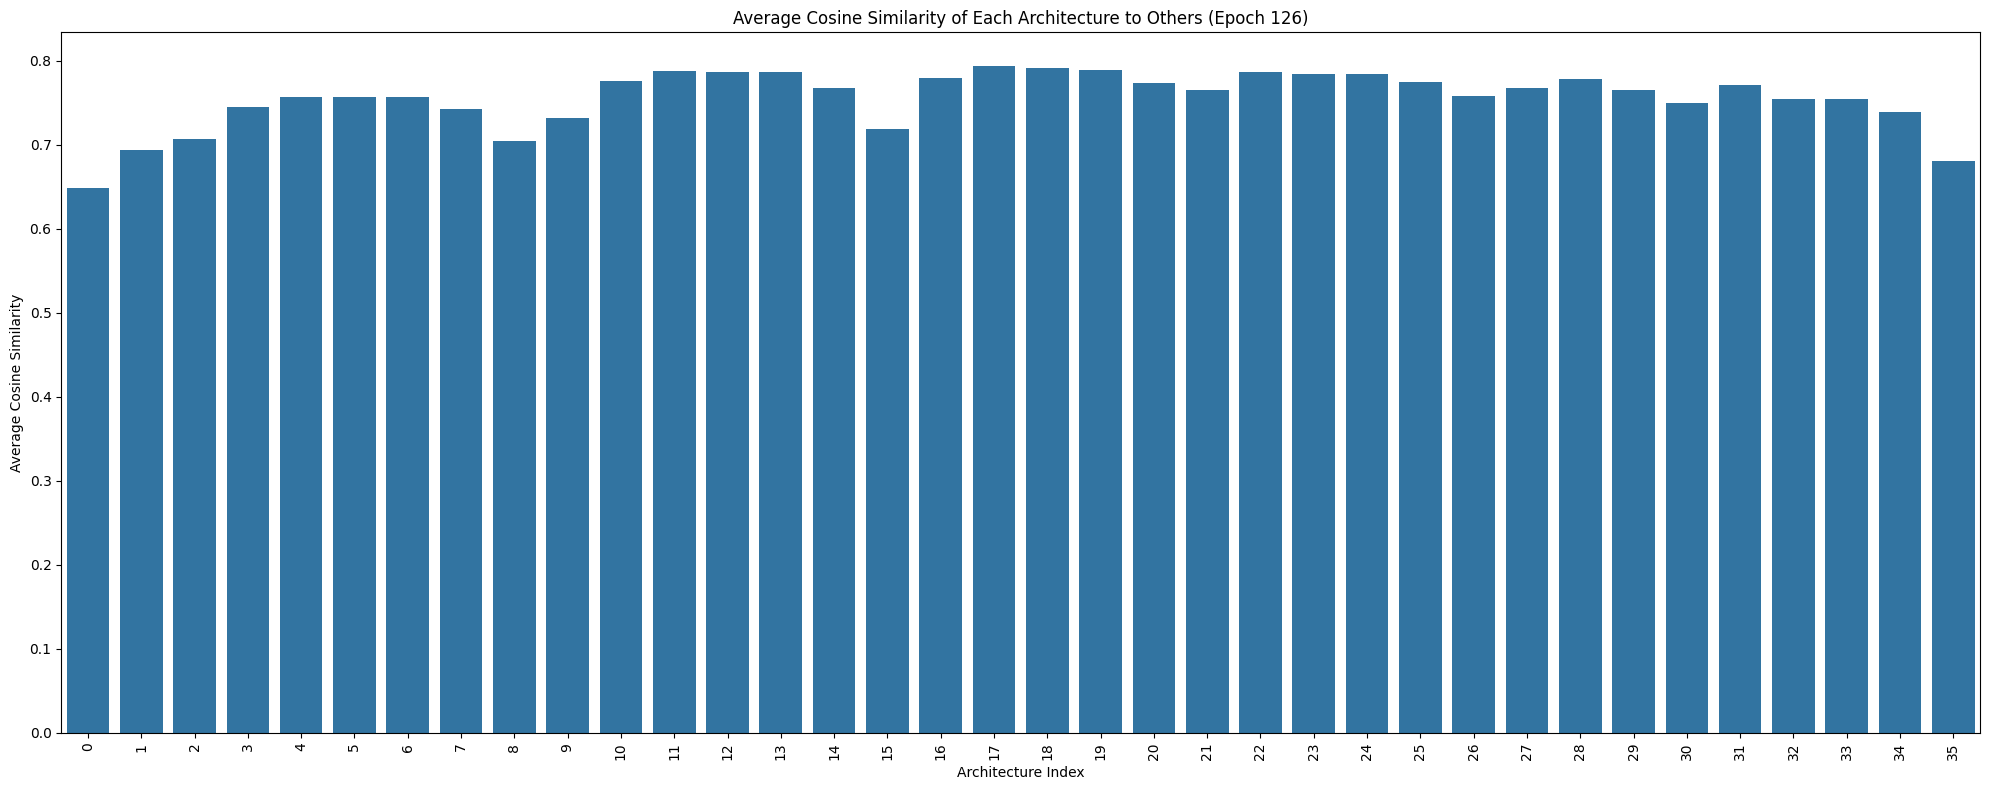

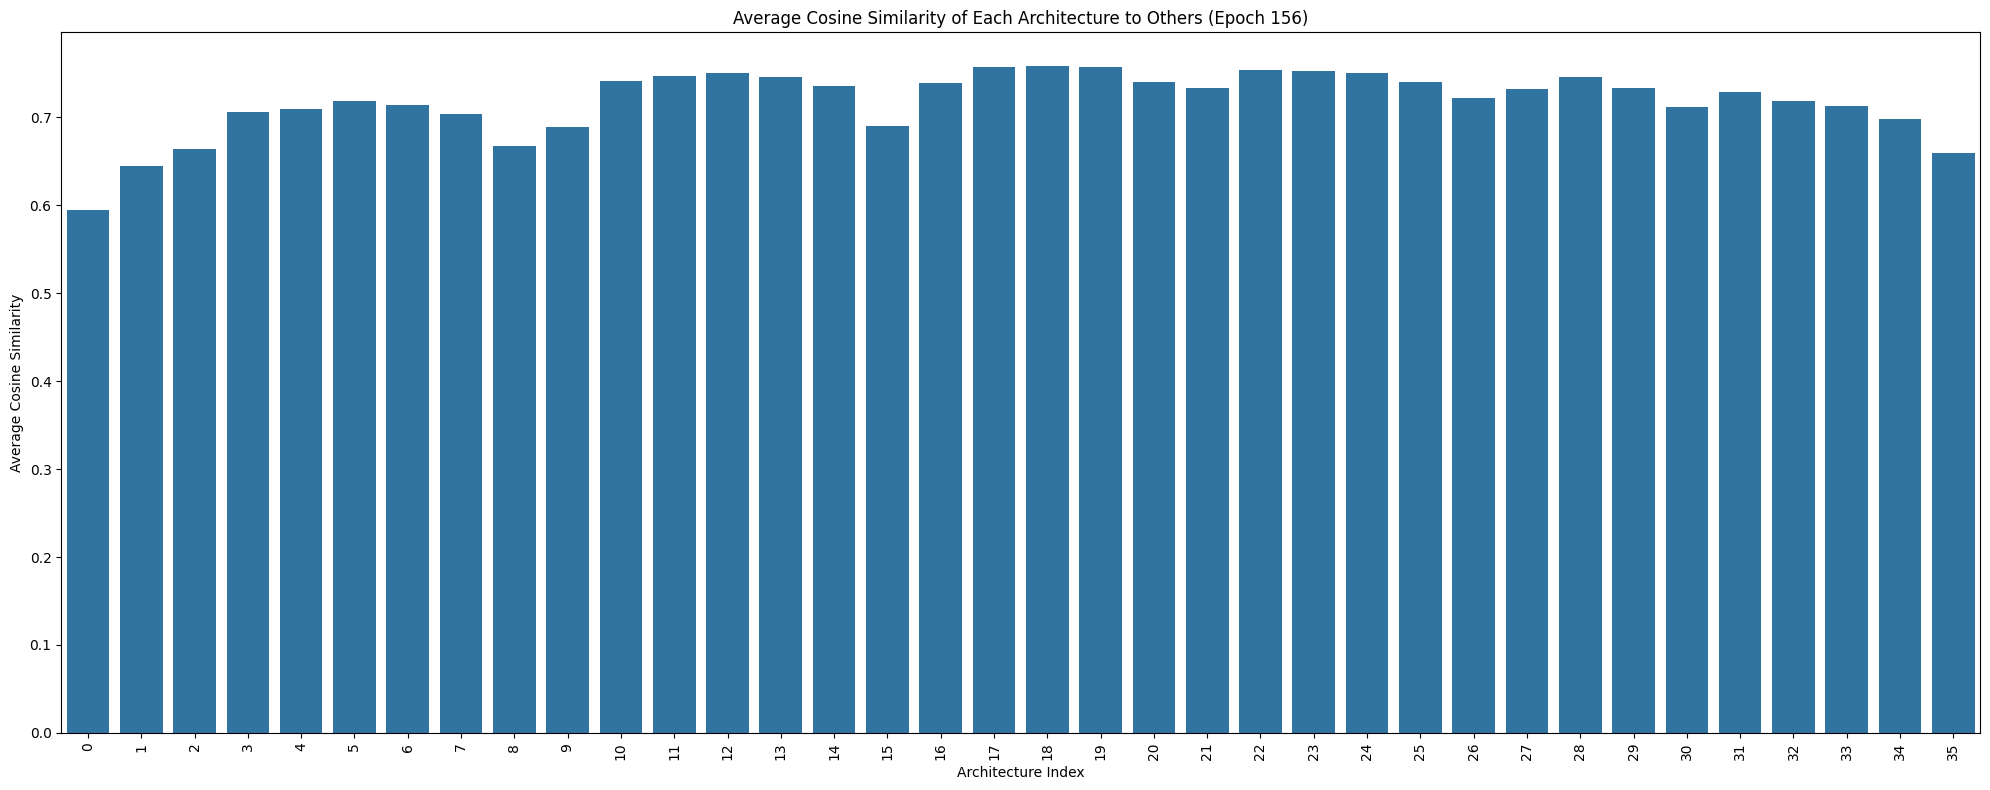

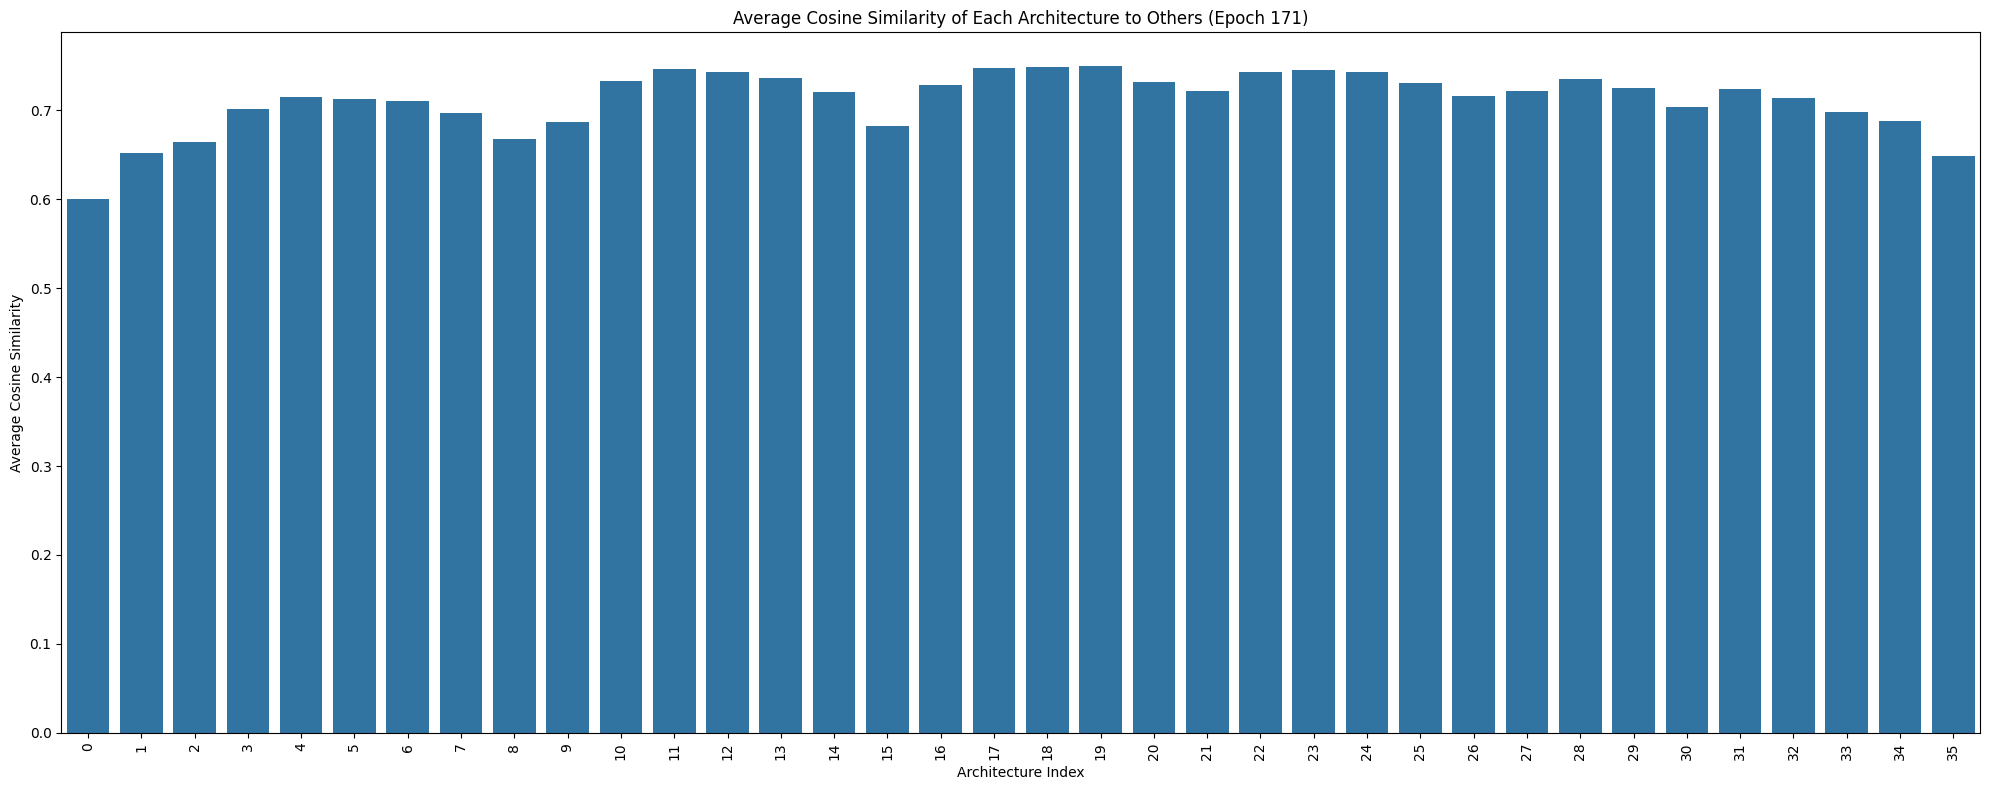

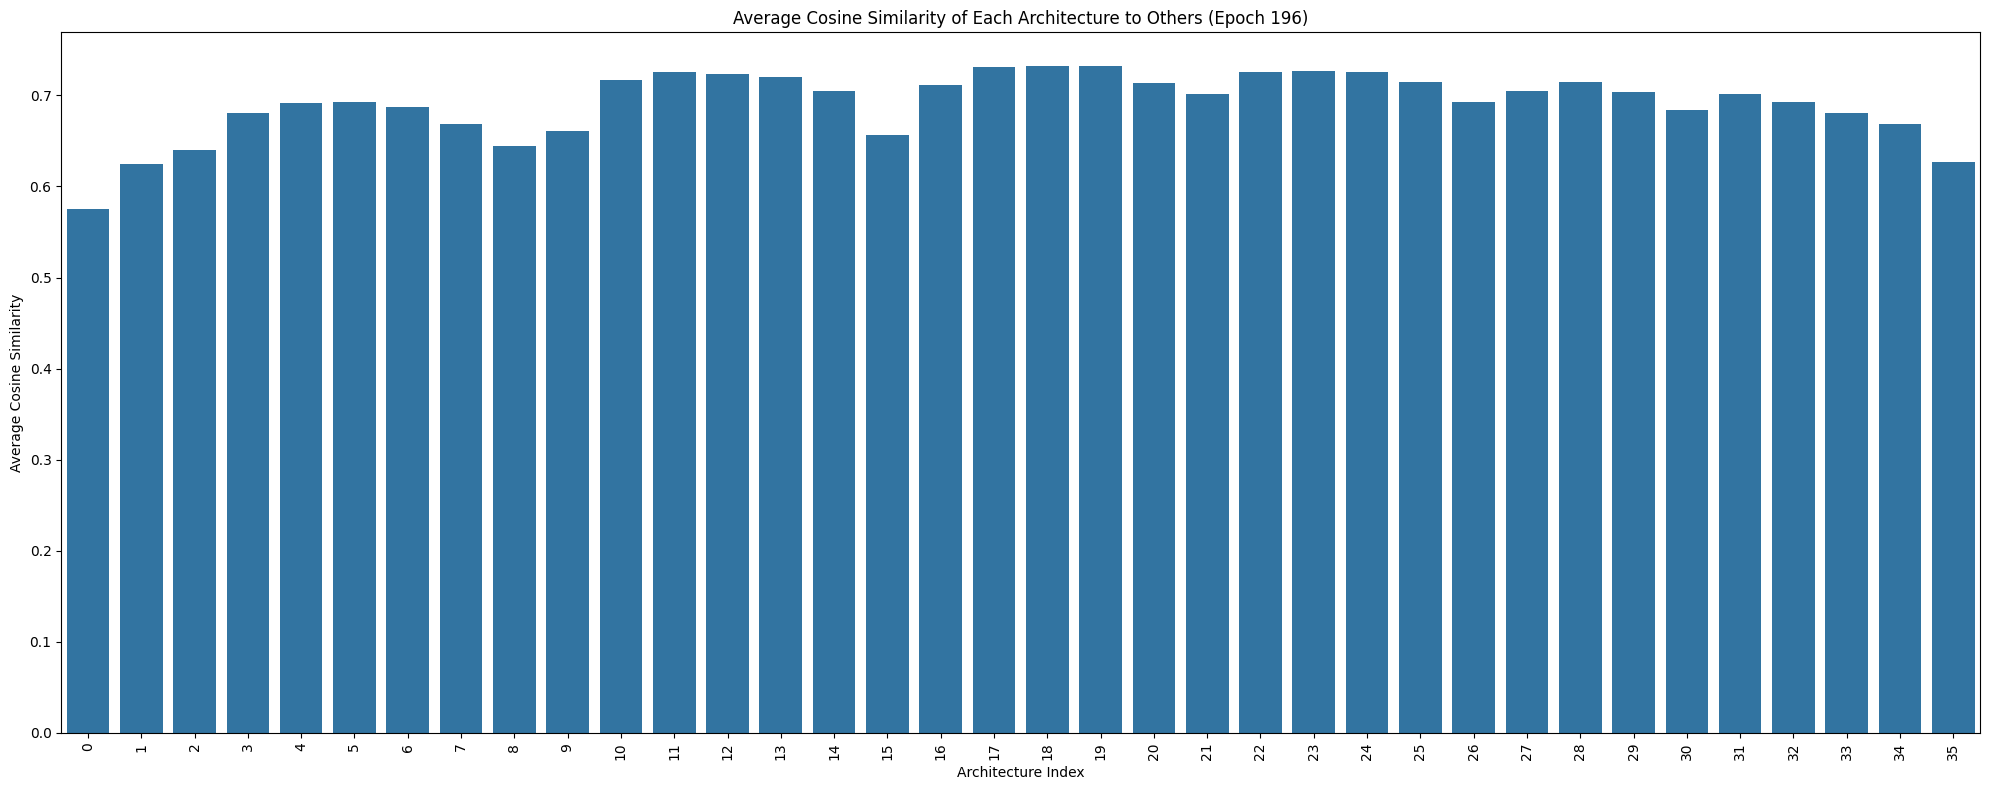

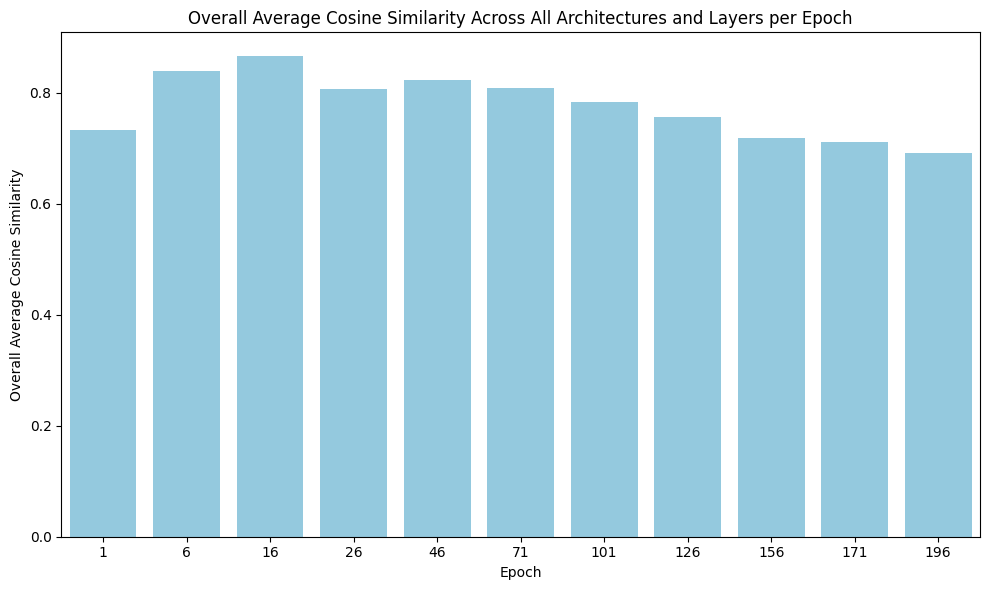

In [49]:
# prompt: For each epoch and each layer give me the bar plot of average similarity of each architecture to other

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate the average similarity for each architecture to all other architectures
architecture_average_similarity = {}
for epoch in sorted(epoch_pairwise_sums.keys()):
    average_pairwise_matrix_epoch = np.zeros((len(all_paths), len(all_paths)))
    for i in range(len(all_paths)):
        for j in range(len(all_paths)):
            if i == j:
                average_pairwise_matrix_epoch[i, j] = np.nan  # Set diagonal to NaN for averaging others
            elif epoch_pairwise_counts[epoch][i, j] > 0:
                average_pairwise_matrix_epoch[i, j] = epoch_pairwise_sums[epoch][i, j] / epoch_pairwise_counts[epoch][i, j]
            else:
                average_pairwise_matrix_epoch[i, j] = np.nan  # Handle cases where no data was available

    architecture_average_similarity[epoch] = np.nanmean(average_pairwise_matrix_epoch, axis=1)


# Prepare data for the bar plot for each architecture
bar_plot_arch_data = []
architecture_indices = list(range(len(all_paths)))

for epoch in sorted(architecture_average_similarity.keys()):
    avg_sims_for_epoch = architecture_average_similarity[epoch]
    for arch_idx, avg_sim in enumerate(avg_sims_for_epoch):
        if not np.isnan(avg_sim):
            bar_plot_arch_data.append({
                'Epoch': epoch,
                'Architecture Index': arch_idx,
                'Average Similarity to Others': avg_sim
            })

df_bar_arch = pd.DataFrame(bar_plot_arch_data)

# Create separate bar plots for each epoch
for epoch in sorted(df_bar_arch['Epoch'].unique()):
    df_epoch = df_bar_arch[df_bar_arch['Epoch'] == epoch]
    plt.figure(figsize=(20, 8))
    sns.barplot(data=df_epoch, x='Architecture Index', y='Average Similarity to Others')
    plt.title(f"Average Cosine Similarity of Each Architecture to Others (Epoch {epoch})")
    plt.xlabel("Architecture Index")
    plt.ylabel("Average Cosine Similarity")
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability if many architectures
    plt.tight_layout()
    plt.show()

# Prepare data for the bar plot for each epoch, showing average over all architectures
epoch_overall_average_sim = []
for epoch in sorted(architecture_average_similarity.keys()):
    avg_sims_for_epoch = architecture_average_similarity[epoch]
    overall_avg_for_epoch = np.nanmean(avg_sims_for_epoch)
    if not np.isnan(overall_avg_for_epoch):
        epoch_overall_average_sim.append({
            'Epoch': epoch,
            'Overall Average Similarity': overall_avg_for_epoch
        })

df_epoch_overall = pd.DataFrame(epoch_overall_average_sim)

# Create a single bar plot showing the overall average similarity per epoch
plt.figure(figsize=(10, 6))
sns.barplot(data=df_epoch_overall, x='Epoch', y='Overall Average Similarity', color='skyblue')
plt.title("Overall Average Cosine Similarity Across All Architectures and Layers per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Overall Average Cosine Similarity")
plt.tight_layout()
plt.show()
